## Load data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://zenodo.org/record/5550238/files/osdg-community-dataset-v21-09-30.csv?download=1', sep='\t')

In [12]:
df.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286
3,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333
4,10.1787/9789264258211-6-en,0006d6e7593776abbdf4a6f985ea6d95,A region reporting a higher rate will not earn...,3,2,2,0.000000


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286
3,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333
4,10.1787/9789264258211-6-en,0006d6e7593776abbdf4a6f985ea6d95,A region reporting a higher rate will not earn...,3,2,2,0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32120 entries, 0 to 32119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              32120 non-null  object 
 1   text_id          32120 non-null  object 
 2   text             32120 non-null  object 
 3   sdg              32120 non-null  int64  
 4   labels_negative  32120 non-null  int64  
 5   labels_positive  32120 non-null  int64  
 6   agreement        32120 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ MB


### Remove unwanted columns


In [15]:
# Remove unwanted columns
data = df.drop(['doi', 'text_id', 'labels_negative', 'labels_positive', 'agreement'], axis=1)
data

,text,sdg
0,"From a gender perspective, Paulgaard points ou...",5
1,Labour legislation regulates maximum working h...,11
2,The average figure also masks large difference...,3
3,The extent to which they are akin to corruptio...,3
4,A region reporting a higher rate will not earn...,3
...,...,...
32115,"It also features individual accountability, wh...",4
32116,Since the full capacity is not likely to be ut...,7
32117,Groundwater quality can also be affected by co...,6
32118,Remedier a ces lacunes est la recommandation p...,2


,text,sdg
0,"From a gender perspective, Paulgaard points ou...",5
1,Labour legislation regulates maximum working h...,11
2,The average figure also masks large difference...,3
3,The extent to which they are akin to corruptio...,3
4,A region reporting a higher rate will not earn...,3
...,...,...
32115,"It also features individual accountability, wh...",4
32116,Since the full capacity is not likely to be ut...,7
32117,Groundwater quality can also be affected by co...,6
32118,Remedier a ces lacunes est la recommandation p...,2


### Remove stop words

In [16]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
import string


#remove the punctuations and stopwords
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)


data['text'] = data['text'].apply(text_process)
data.iloc[0][0]
df.iloc[0][2]
## Convert words to vectors using TFIDF Vectorizer

[nltk_data] Downloading package stopwords to /Users/pan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'From a gender perspective, Paulgaard points out that the labour markets of the fishing villages have been highly gender-segregated in terms of the existence of "male jobs" and "female jobs"; however, the new business opportunities have led to the male population of the peripheral areas now working in the service industry in former "female jobs": "That boys and girls are doing the same jobs indicates change, because traditional boundaries between women and men\'s work are being crossed. But the fact that young people are still working represents continuity with the past" (Paulgaard 2002: 102). When Paulgaard refers to continuity with traditions, she refers to the expectations of young adults to participate in adult culture, thus these fishing villages traditionally have no actual youth culture. As described earlier, Paulgaard (2015) concludes that in some of Norway\'s peripheral areas school is still \'foreign\', a time waster stealing time from young adults who should instead spend th

### Handle missing value

In [ ]:
## TODO:

## Distribution

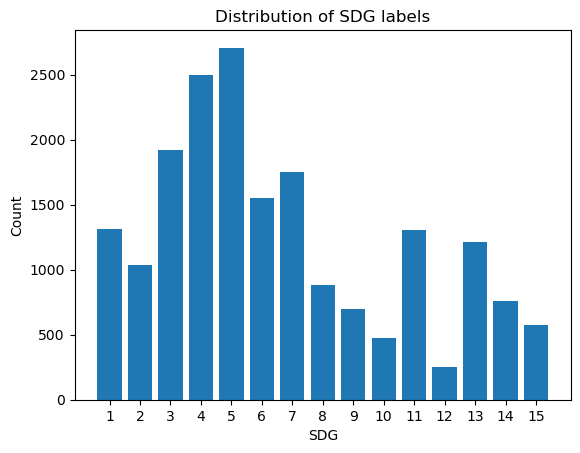

[nltk_data] Downloading package punkt to /Users/pan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
data['sdg'].value_counts()
sdg_counts = data['sdg'].value_counts()
plt.bar(sdg_counts.index, sdg_counts.values)

plt.xticks(sdg_counts.index)
plt.xlabel('SDG')
plt.ylabel('Count')
plt.title('Distribution of SDG labels')

plt.show()
# Import nltk packages and Punkt Tokenizer Models
import nltk

nltk.download("punkt")
import warnings

warnings.filterwarnings('ignore')

## Create WordClouds


In [ ]:
## TODO:

## Convert words to vectors using TFIDF Vectorizer

In [ ]:
## TODO:

## Select confident instances

In [5]:
# select confident instances (based on agreement score) to train the model
data_agreement = data[data['agreement'] >= 0.6]

## Create K means label

In [ ]:
## TODO:

## Split data into training and test set

In [ ]:
## TODO:

## Model training

In [ ]:
## TODO: K means label

In [ ]:
## TODO: original label

## Evaluate metric

In [ ]:
## TODO: accuracy，f1 score